In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# MLP (a MultiLayer Perceptron)

- Made in 성남동 숨 at 2017/07/22
- Modified at 2017/07/24

Kyunghoon Kim ( kyunghoon@unist.ac.kr )

In [190]:
import numpy as np
import scipy.special
import struct
import pandas as pd
import timeit

# NN Class

In [3]:
class neuralNetwork:

    # 신경망 초기화
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # i : index of input layer
        # h : index of hidden layer
        # o : index of output layer
        
        ### 노드 개수
        self.inodes = inputnodes # 입력 계층 노드 개수
        self.hnodes = hiddennodes # 히든 계층 노드 개수
        self.onodes = outputnodes # 출력 계층 노드 개수
        
        ### 학습률
        self.lr = learningrate
        
        ### weight matrix W_i_h 와 W_h_o
        ## 값 초기화 방법 1
        # 가중치는 nonnegative 조건이 아니라 음수도 있어야 함.
        # np.random.rand는 0~1의 값을 가지므로 여기에서 0.5를 빼주어서 -0.5 ~ 0.5의 값을 가지도록 함.
        # self.wih = (np.random.rand(self.hnodes, self.inodes) - 0.5)
        # self.who = (np.random.rand(self.onodes, self.hnodes) - 0.5)
        
        ## 값 초기화 방법 2
        # np.random.normal()은 정규분포에 따른 행렬 생성
        # np.random.normal(정규분포의 중심, 표준편차, 행렬 크기)
        # 표준편차는 노드로 들어오는 연결 노드의 개수에 루트를 씌우고 역수를 취한 값
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        ### 활성화 함수
        self.activation_function = lambda x: scipy.special.expit(x)
    
    
    # 신경망 학습
    def train(self, inputs_list, targets_list):
        """
            inputs_list
            targets_list
        """
        # 입력 리스트를 2D array로 변환하고 transpose 취함
        if isinstance(inputs_list, np.ndarray):
            inputs = np.array(inputs_list, ndmin=2)
        else:
            inputs = np.array(inputs_list, ndmin=2).T
            
        if isinstance(targets_list, np.ndarray):
            targets = np.array(targets_list, ndmin=2).T
        else:
            targets = np.array(targets_list, ndmin=2).T
        
        ## PROPAGATION
        # hidden layer로 들어오는 값 계산
        hidden_inputs = np.dot(self.wih, inputs)
        # hidden layer에서 나가는 값 계산
        hidden_outputs = self.activation_function(hidden_inputs)

        # output layer로 들어오는 값 계산
        output_inputs = np.dot(self.who, hidden_outputs)
        # output layer에서 나가는 값 계산
        output_outputs = self.activation_function(output_inputs)
        
        ## ERROR
        # output layer error 계산
        # (실제 값 - 계산 값)
        output_errors = targets - output_outputs
        # hidden layer error 계산
        hidden_errors = np.dot(self.who.T, output_errors)
        
        ## BACK PROPAGATION
        # weight 업데이트
        # W_h_o
        self.who += self.lr * np.dot((output_errors * output_outputs * (1.0 - output_outputs)), np.transpose(hidden_outputs))
        # W_i_h
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
    
    # 신경망에 질의
    def query(self, inputs_list):
        # 입력 리스트를 2D array로 변환하고 transpose 취함
        if isinstance(inputs_list, np.ndarray):
            inputs = np.array(inputs_list, ndmin=2)
        else:
            inputs = np.array(inputs_list, ndmin=2).T
        
        # hidden layer로 들어오는 값 계산
        hidden_inputs = np.dot(self.wih, inputs)
        # hidden layer에서 나가는 값 계산
        hidden_outputs = self.activation_function(hidden_inputs)

        # output layer로 들어오는 값 계산
        output_inputs = np.dot(self.who, hidden_outputs)
        # output layer에서 나가는 값 계산
        output_outputs = self.activation_function(output_inputs)
        
        return output_outputs

# Working Test

In [4]:
input_nodes = 3
hidden_nodes = 10
output_nodes = 3

learning_rate = 0.3

In [5]:
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

## EX 1

In [7]:
for i in range(100):
    n.train([1, 1, 1], [1, 0, 0])
for i in range(100):
    n.train([0, 0, 1], [0, 1, 0])

In [8]:
n.query([0.9, 0.9, 0.9])

array([[ 0.07640506],
       [ 0.90272678],
       [ 0.02157706]])

In [9]:
n.query([0., 0.1, 0.99])

array([[ 0.07687782],
       [ 0.92177904],
       [ 0.05577815]])

## EX 1

In [28]:
input_nodes = 3
hidden_nodes = 10
output_nodes = 3

learning_rate = 0.3

In [29]:
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

### Wrong training set

In [20]:
for i in range(1000):
    n.train([1, 0, 0], [1, 0, 0])
for i in range(1000):
    n.train([0, 1, 0], [0, 1, 0])
for i in range(1000):
    n.train([0, 0, 1], [0, 0, 1])

### Correct training set

In [30]:
for i in range(1000):
    n.train([1, 0, 0], [1, 0, 0])
    n.train([0, 1, 0], [0, 1, 0])
    n.train([0, 0, 1], [0, 0, 1])

### Query

In [31]:
n.query([0.8, 0.2, 0])

array([[ 0.94147669],
       [ 0.05613267],
       [ 0.01347392]])

In [32]:
n.query([1, 0.5, 1])

array([[ 0.32600311],
       [ 0.02685011],
       [ 0.47968271]])

In [33]:
n.query([0, 1, 0])

array([[ 0.01901628],
       [ 0.97454534],
       [ 0.02218404]])

In [34]:
n.query([0, 0.1, 1])

array([[ 0.02191218],
       [ 0.02411812],
       [ 0.97113506]])

# MNIST Data Set

##### http://yann.lecun.com/exdb/mnist/
- train-images-idx3-ubyte.gz:  training set images (9912422 bytes)
- train-labels-idx1-ubyte.gz:  training set labels (28881 bytes) 
- t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes) 
- t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)

In [30]:
url1 = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
url2 = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
url3 = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
url4 = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'

In [36]:
!wget {url1}
!wget {url2}
!wget {url3}
!wget {url4}

--2017-07-22 16:27:00--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz.1’

100%[======================================>] 9,912,422   1.59MB/s   in 7.8s   

2017-07-22 16:27:08 (1.21 MB/s) - ‘train-images-idx3-ubyte.gz.1’ saved [9912422/9912422]

--2017-07-22 16:27:08--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

100%[======================================>] 28,881       139KB/s   in 0.2s   

2017-07-22 16:27:09 (139 KB/s) - ‘train-label

In [37]:
!gzip -d ./*.gz

### Data Load

train-images.idx3-ubyte 은 784 (28 x 28) 씩 읽기

In [114]:
train_images = open('train-images-idx3-ubyte', 'rb')
train_labels = open('train-labels-idx1-ubyte', 'rb')

In [115]:
# 사용할 변수 초기화
train_data = [[]for i in range(10)] # 숫자별로 저장 (0 ~ 9)
 
# Data Skip
train_i = train_images.read(16) # read first 16byte
train_l = train_labels.read(8) # read first 8byte

In [116]:
while True:    
    train_i = train_images.read(784) # read 784 byte
    train_l = train_labels.read(1)   # read 1 byte

    if not train_i or not train_l:
        break

    index = int(train_l[0])
    img = np.reshape( struct.unpack(len(train_i)*'B', train_i), (28,28) )
    train_data[index].append(img) # 각 숫자 영역에 해당 숫자 이미지 추가

### Data Test

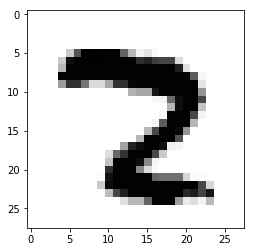

In [117]:
number = 2
index = 3
plt.imshow(train_data[number][index], cmap='Greys');

### Data Statistics

In [118]:
for i in range(10):
    print(i, ':', len(train_data[i]))

0 : 5923
1 : 6742
2 : 5958
3 : 6131
4 : 5842
5 : 5421
6 : 5918
7 : 6265
8 : 5851
9 : 5949


### Data Save

In [10]:
np.save('train_data', train_data)

### Data Load

In [42]:
train_data = np.load('train_data.npy')

# Data Setting

입력 값을 0~255에서 0.01~1.0으로 바꾸기

In [43]:
scaled_train_data = [[]for i in range(10)]
for idx, train_number in enumerate(train_data):
    for datum in train_number:
        scaled_datum = (numpy.asfarray(datum)/255)*0.99+0.01
        scaled_datum = scaled_datum.reshape(-1, 1)
        scaled_train_data[idx].append(scaled_datum)

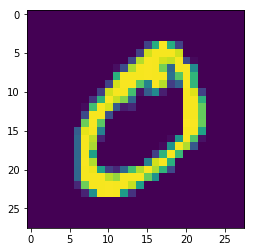

In [44]:
plt.imshow(scaled_train_data[0][0].reshape(28, 28))

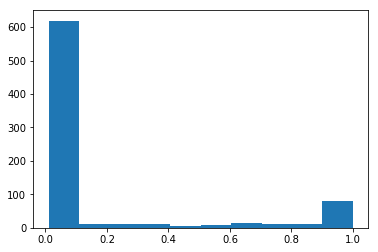

In [45]:
plt.hist(scaled_train_data[0][0]);

# Generate Target data

In [46]:
target_data = dict()
for i in range(10):
    target_data[i] = np.zeros(10)+0.01
    target_data[i][i] = 0.99

# Train

In [47]:
input_nodes = 28*28
hidden_nodes = 10
output_nodes = 10

learning_rate = 0.1

In [48]:
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [49]:
# f, (ax1, ax2) = plt.subplots(1, 2)
# p = ax1.imshow(n.who, cmap='Greys')
# plt.colorbar(p,ax=ax1)
# ax2.hist(n.who.reshape(-1, 1));

In [50]:
reordered_train_data = []
temp = []
for i in range(5000):
    temp.append(i)
    if i % 10 == 0:
        reordered_train_data.append(temp)
        temp = []

### Correct Training

In [51]:
# 몇 개씩 묶어서 학습시키기
for idx_list in reordered_train_data:
    for i in range(10):
        for idx in idx_list:
            n.train(scaled_train_data[i][idx], target_data[i])

### Wrong Training

In [176]:
# 돌아가면서 학습시키기
for i in range(5000):
    for j in range(10):
        n.train(inputs_list = scaled_train_data[j][i], targets_list=target_data[j])

### Selected Number Training

In [20]:
# num = 3
# for i in range(len(scaled_train_data[num])):
#     n.train(inputs_list=scaled_train_data[num][i], targets_list=target_data[num])

### Check Data Set

In [52]:
from IPython import display

In [ ]:
num = 1
fig, ax = plt.subplots(1,1)
for idx, i in enumerate(scaled_train_data[num]):
    plt.imshow(i.reshape(28, 28), cmap='Greys');
    display.clear_output(wait=True)
    display.display(plt.gcf())
#     time.sleep(0.01)
    if idx == 1000:
        break

# Query

In [54]:
def train_check(number, index):
    plt.imshow(scaled_train_data[number][index].reshape(28, 28), cmap='Greys')
    print(
        np.round(n.query(scaled_train_data[number][index]), 3)
    )
def train_check_ori(number, index):
    plt.imshow(train_data[number][index].reshape(28, 28), cmap='Greys')
    print(
        np.round(n.query(train_data[number][index].reshape(-1, 1)), 3)
    )

[[ 0.676]
 [ 0.001]
 [ 0.003]
 [ 0.009]
 [ 0.   ]
 [ 0.675]
 [ 0.001]
 [ 0.007]
 [ 0.047]
 [ 0.002]]


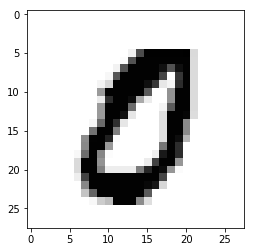

In [55]:
train_check_ori(0, 10)

[[ 0.693]
 [ 0.001]
 [ 0.004]
 [ 0.008]
 [ 0.   ]
 [ 0.635]
 [ 0.001]
 [ 0.008]
 [ 0.042]
 [ 0.002]]


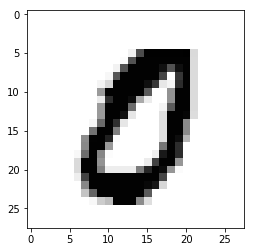

In [63]:
train_check(0, 10)

[[ 0.905]
 [ 0.001]
 [ 0.029]
 [ 0.002]
 [ 0.   ]
 [ 0.039]
 [ 0.02 ]
 [ 0.042]
 [ 0.002]
 [ 0.   ]]


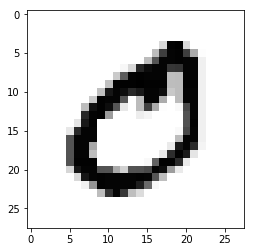

In [61]:
train_check(0, 1)

[[ 0.   ]
 [ 0.851]
 [ 0.008]
 [ 0.046]
 [ 0.003]
 [ 0.052]
 [ 0.001]
 [ 0.004]
 [ 0.039]
 [ 0.004]]


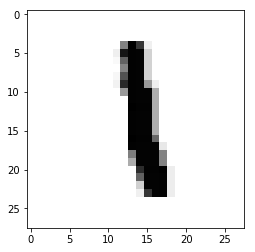

In [57]:
train_check(1, 1)

[[ 0.004]
 [ 0.   ]
 [ 0.951]
 [ 0.042]
 [ 0.034]
 [ 0.   ]
 [ 0.002]
 [ 0.042]
 [ 0.009]
 [ 0.   ]]


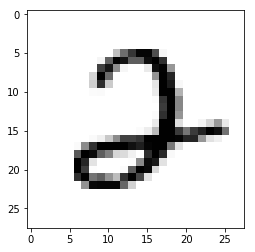

In [58]:
train_check(2, 1)

[[ 0.006]
 [ 0.004]
 [ 0.002]
 [ 0.001]
 [ 0.004]
 [ 0.799]
 [ 0.098]
 [ 0.   ]
 [ 0.436]
 [ 0.003]]


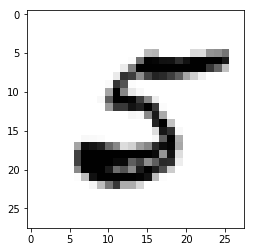

In [59]:
train_check(5, 100)

[[ 0.001]
 [ 0.013]
 [ 0.   ]
 [ 0.008]
 [ 0.113]
 [ 0.03 ]
 [ 0.   ]
 [ 0.024]
 [ 0.029]
 [ 0.884]]


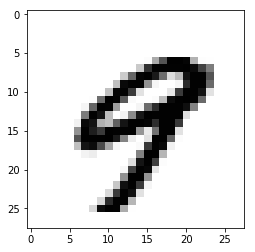

In [60]:
train_check(9, 100)

-----
-----

-----

# Test Data Load

In [65]:
test_images = open('t10k-images-idx3-ubyte', 'rb')
test_labels = open('t10k-labels-idx1-ubyte', 'rb')

In [67]:
# 사용할 변수 초기화
test_data = [[]for i in range(10)] # 숫자별로 저장 (0 ~ 9)
 
# Data Skip
test_i = test_images.read(16) # read first 16byte
test_l = test_labels.read(8) # read first 8byte

In [68]:
while True:    
    test_i = test_images.read(784) # read 784 byte
    test_l = test_labels.read(1)   # read 1 byte

    if not test_i or not test_l:
        break

    index = int(test_l[0])
    img = np.reshape( struct.unpack(len(test_i)*'B', test_i), (28,28) )
    test_data[index].append(img) # 각 숫자 영역에 해당 숫자 이미지 추가

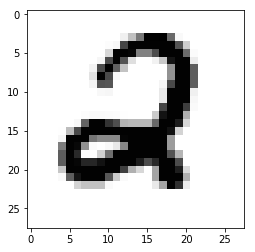

In [70]:
number = 2
index = 10
plt.imshow(test_data[number][index], cmap='Greys');

In [71]:
for i in range(10):
    print(i, ':', len(test_data[i]))

0 : 980
1 : 1135
2 : 1032
3 : 1010
4 : 982
5 : 892
6 : 958
7 : 1028
8 : 974
9 : 1009


In [72]:
np.save('test_data', test_data)

In [73]:
scaled_test_data = [[]for i in range(10)]
for idx, test_number in enumerate(test_data):
    for datum in test_number:
        scaled_datum = (numpy.asfarray(datum)/255)*0.99+0.01
        scaled_datum = scaled_datum.reshape(-1, 1)
        scaled_test_data[idx].append(scaled_datum)

# Evaluation

In [78]:
def test_check(number, index):
    plt.imshow(scaled_test_data[number][index].reshape(28, 28), cmap='Greys')
    print(
        np.round(n.query(scaled_test_data[number][index]), 3)
    )
def test_check_ori(number, index):
    plt.imshow(test_data[number][index].reshape(28, 28), cmap='Greys')
    print(
        np.round(n.query(test_data[number][index].reshape(-1, 1)), 3)
    )

[[ 0.766]
 [ 0.001]
 [ 0.128]
 [ 0.004]
 [ 0.   ]
 [ 0.038]
 [ 0.122]
 [ 0.01 ]
 [ 0.002]
 [ 0.   ]]


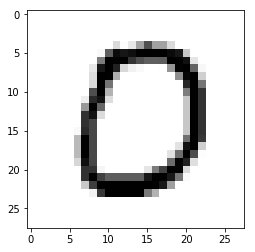

In [79]:
test_check(0, 1)

[[ 0.953]
 [ 0.001]
 [ 0.055]
 [ 0.003]
 [ 0.   ]
 [ 0.025]
 [ 0.046]
 [ 0.024]
 [ 0.002]
 [ 0.   ]]


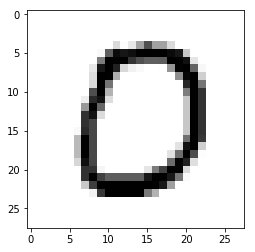

In [80]:
test_check_ori(0, 1)

# Evaluation Visualization

In [156]:
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [157]:
total_score = dict()
for i in range(10):
    total_score[i] = list()

In [195]:
tic = timeit.default_timer()
for ite in range(10):
    ttic = timeit.default_timer()
    # 몇 개씩 묶어서 학습시키기
    for idx_list in reordered_train_data:
        for i in range(10):
            for idx in idx_list:
                n.train(scaled_train_data[i][idx], target_data[i])

    for number in range(10):
        score = []
        for i in scaled_test_data[number]:
            if np.argmax( n.query(i) ) == number:
                score.append(1)
            else:
                score.append(0)
        total_score[number].append(sum(score)/len(test_data[number]))
    ttoc = timeit.default_timer()
    print(ite, ttoc - ttic)
toc = timeit.default_timer()
print("Total: ", toc - tic)

0 3.197671715170145
1 3.1807212359271944
2 3.212383781094104
3 3.2098194886930287
4 3.1801378512755036
5 3.1799865746870637
6 3.1587102659977973
7 3.1939914291724563
8 3.1495218770578504
9 3.1634878292679787
Total:  31.828150774352252


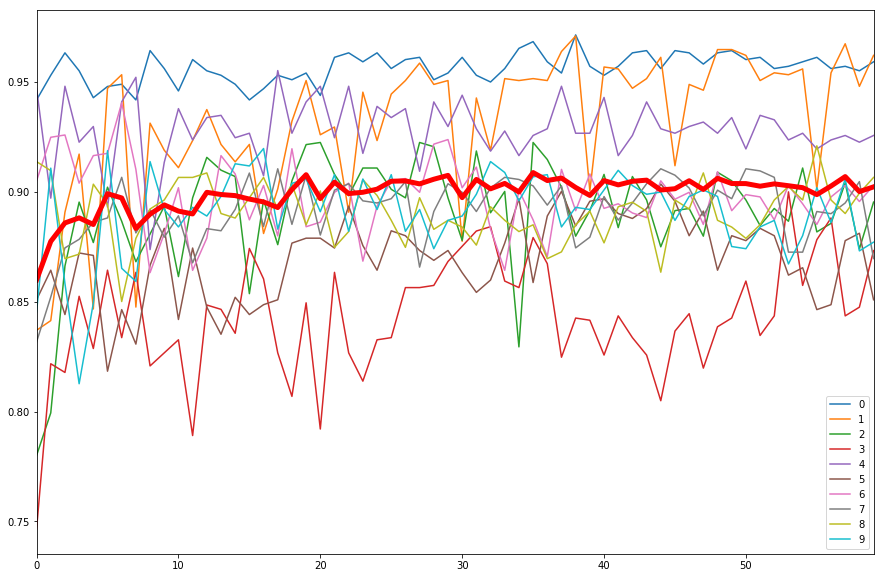

In [196]:
pd.DataFrame(total_score).plot(figsize=(15, 10));
pd.DataFrame(total_score).mean(axis=1).plot(color='r', lw=5)